# Branched Convolutional NN

In [1]:
# Import io functions
import setGPU0
from io_functions import *
from draw_functions import *

Couldn't import dot_parser, loading of dot files will not be possible.
using

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


 gpu0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

## Prepare the data

In [3]:
train_data, test_data, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [4]:
train_data.shape

(54236, 1, 20, 20, 25)

## Create and train the model

In [5]:
model = Sequential()

model.add(Convolution3D(3, 5, 5, 6, input_shape = (1, 20, 20, 25), activation='relu'))
model.add(Convolution3D(3, 4, 4, 5, input_shape = (1, 20, 20, 25), activation='relu'))
model.add(MaxPooling3D())
model.add(Dropout(0.25))
model.add(Flatten())

## fully connected ending
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd')
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution3d_1 (Convolution3D)    (None, 3, 16, 16, 20453         convolution3d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 3, 16, 16, 200           convolution3d_1[0][0]            
____________________________________________________________________________________________________
convolution3d_2 (Convolution3D)    (None, 3, 13, 13, 16723         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)          (None, 3, 13, 13, 160           convolution3d_2[0][0]            
___________________________________________________________________________________________

In [7]:
fit_history = model.fit(train_data, train_labels, nb_epoch=1, batch_size=1000, verbose=1)

Epoch 1/1
54236/54236 [==============================] - 232s - loss: 0.9824   


In [8]:
predictions = model.predict(test_data)
#store_model(model, fit_history.history['loss'], 'scnn', (predictions, test_labels))

### Classification Histogram

In [8]:
# Get the test signal and background to make the histogram
test_signal = test_data[np.where(test_labels==1)]
test_bkg    = test_data[np.where(test_labels==0)]

# Calculate the probabilities for the test sets
p_signal    = bmodel.predict(test_signal)
p_bkg       = bmodel.predict(test_bkg)


TclError: couldn't connect to display "localhost:11.0"

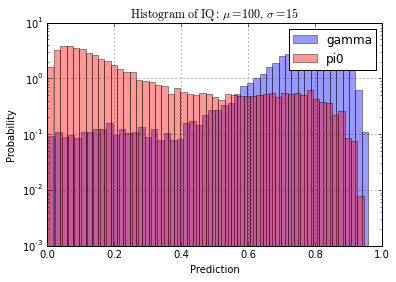

In [10]:
# Draw classification histogram
plt.hist(p_signal, 50, normed=1, facecolor='blue', alpha=0.4, label='gamma')
plt.hist(p_bkg , 50, normed=1, facecolor='red' , alpha=0.4, label='pi0')
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### ROC Curve

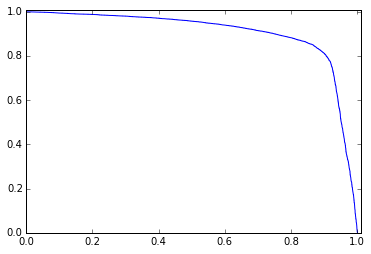

In [9]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )

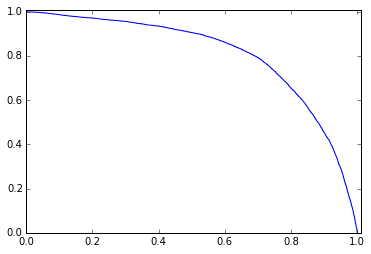

In [15]:
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )